In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
def girvan_newman_modified(graph, num_communities):
    G = graph.copy()
    
    while nx.number_connected_components(G) < num_communities:
        edge_centrality = nx.edge_betweenness_centrality(G)
        max_edge = max(edge_centrality, key=edge_centrality.get)
        G.remove_edge(*max_edge)
    
    communities = list(nx.connected_components(G))
    return communities


In [3]:
def plot_colored_communities(G, communities):
    node_colors = []
    for node in G.nodes:
        for i, community in enumerate(communities):
            if node in community:
                node_colors.append(i)
                break
    
    pos = nx.spring_layout(G)
    plt.figure(figsize=(9,9))
    nx.draw(G, pos, node_color=node_colors, cmap=plt.cm.Set3, with_labels=False, node_size=200)
    plt.show()

In [4]:
import pandas as pd
import networkx as nx
import numpy as np

# Read adjacency matrix from CSV file without headers
def read_adjacency_matrix_from_csv(file_path):
    adjacency_matrix_df = pd.read_csv(file_path, header=None)
    adjacency_matrix = adjacency_matrix_df.values
    num_nodes = len(adjacency_matrix)
    nodes = [str(i) for i in range(num_nodes)]
    return nodes, adjacency_matrix

# Create a graph from adjacency matrix
def create_graph(nodes, adjacency_matrix):
    G = nx.Graph()
    G.add_nodes_from(nodes)
    # Convert the adjacency matrix to edges
    # edges = np.column_stack(np.where(adjacency_matrix != 0))
    edges = [(str(i), str(j)) for i in range(len(adjacency_matrix))
             for j in range(len(adjacency_matrix[i]))
             if adjacency_matrix[i][j] != 0]

    G.add_edges_from(edges)

    return G

# You can now use 'graph' as a NetworkX graph


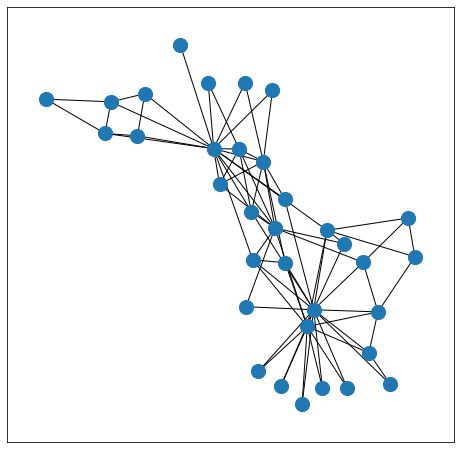

In [16]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv("D1-K=2.csv")
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=200)

In [5]:
def save_results(commies, file_name):

    communities = []
    vertices = []

    for set_number, vertex_set in enumerate(commies):
        for vertex in vertex_set:
            vertices.append(int(vertex))
            communities.append(set_number+1)

    df = pd.DataFrame({'vertex': vertices, 'community': communities})

    # Sort the DataFrame by vertices in ascending order
    df = df.sort_values(by='vertex')
    df.to_csv(file_name, index=False, header=False)


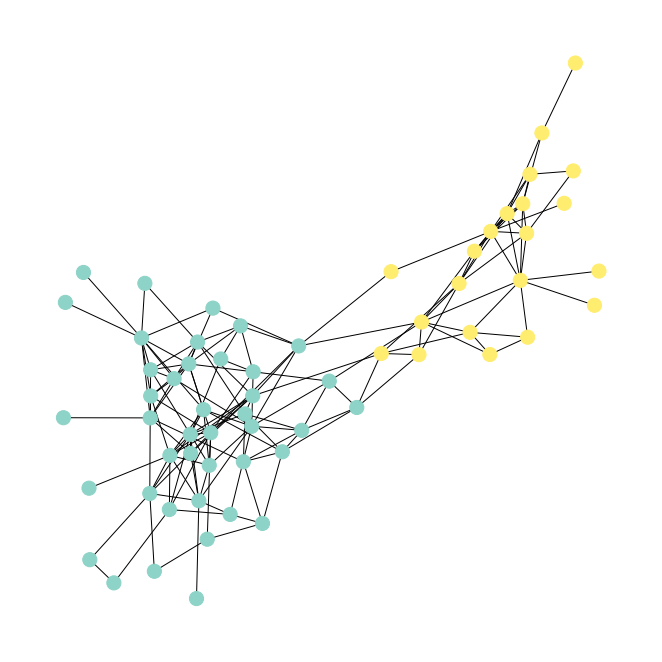

In [46]:
commies = girvan_newman_modified(G, 2)
plot_colored_communities(G, commies)

In [47]:
save_results(commies, 'KU-D1-K=2.csv')

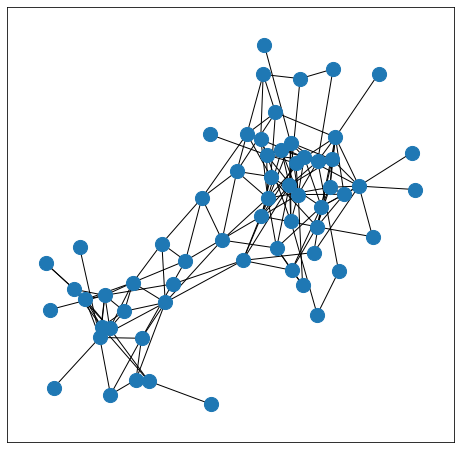

In [48]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv("D2-K=7.csv")
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=200)

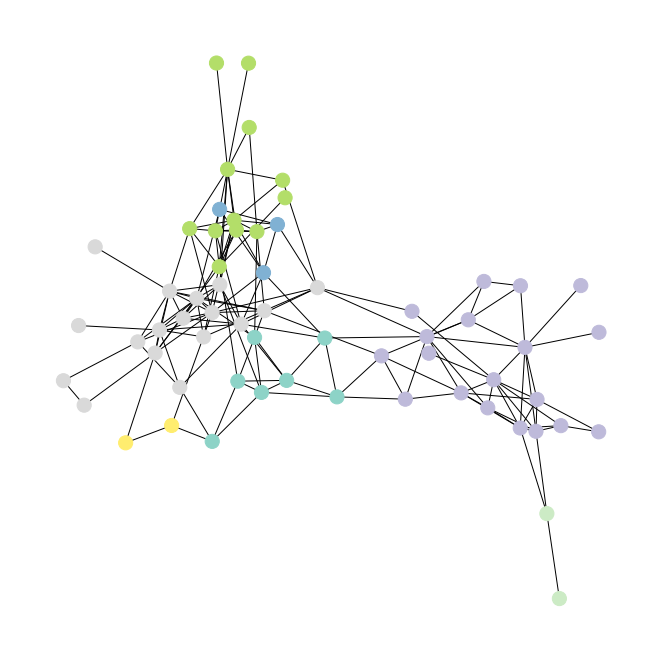

In [49]:
commies = girvan_newman_modified(G, 7)
plot_colored_communities(G, commies)

In [50]:
save_results(commies, 'KU-D2-K=7.csv')

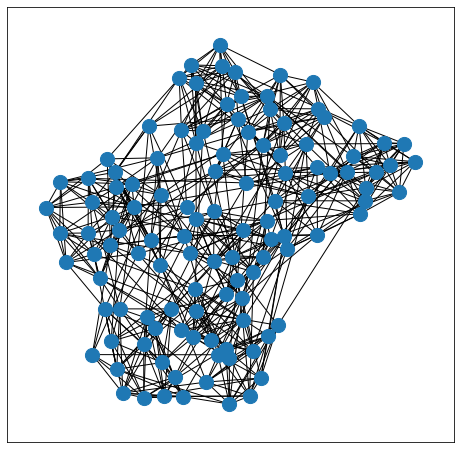

In [15]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv('D3-K=12.csv')
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=200)

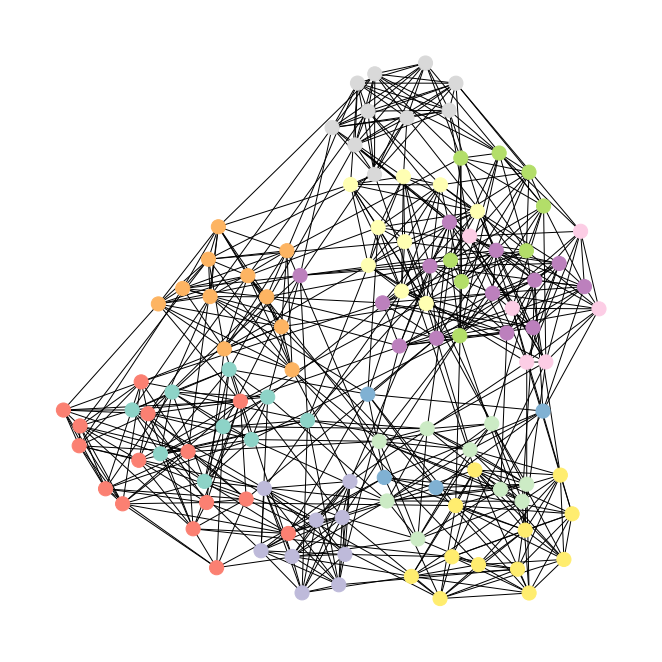

In [52]:
commies = girvan_newman_modified(G, 12)
plot_colored_communities(G, commies)

In [53]:
save_results(commies, 'KU-D3-K=12.csv')

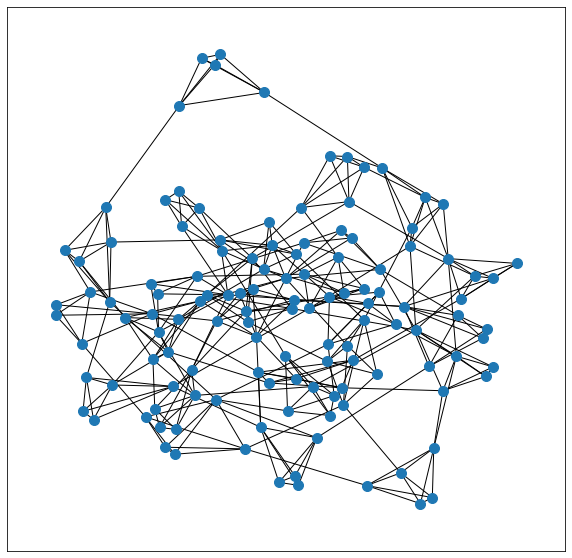

In [29]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv("D1-UNC.csv")
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=100)

In [31]:
import community

partition = community.best_partition(G)
num_communities = len(set(partition.values()))
num_communities

15

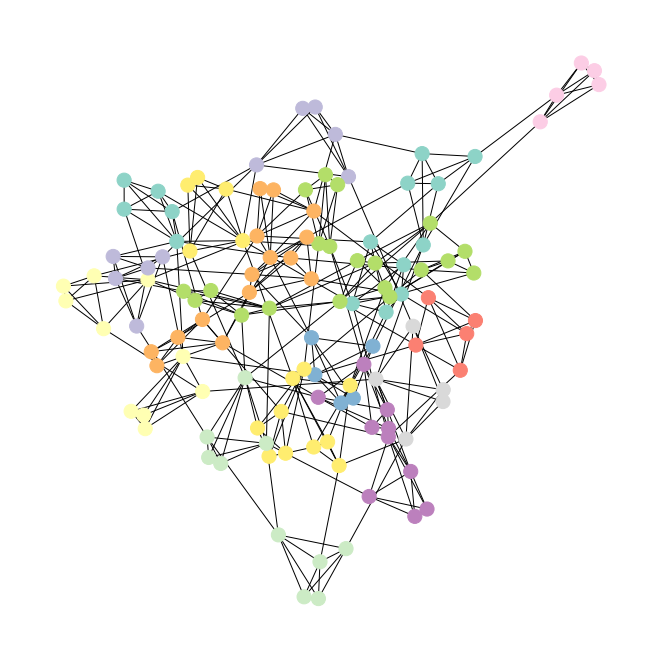

In [32]:
commies = girvan_newman_modified(G, 15)
plot_colored_communities(G, commies)

In [33]:
save_results(commies, 'KU-D1-UNC.csv')

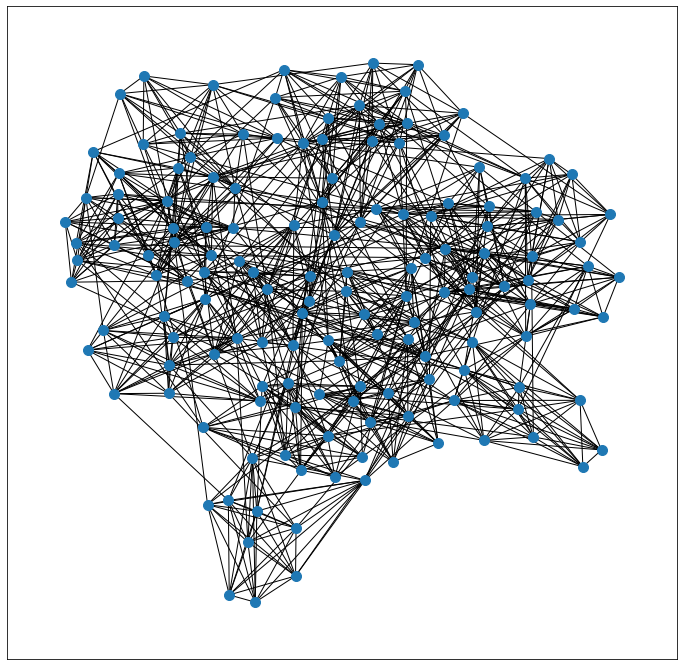

In [34]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv("D2-UNC.csv")
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=100)

In [35]:
partition = community.best_partition(G)
num_communities = len(set(partition.values()))
num_communities

15

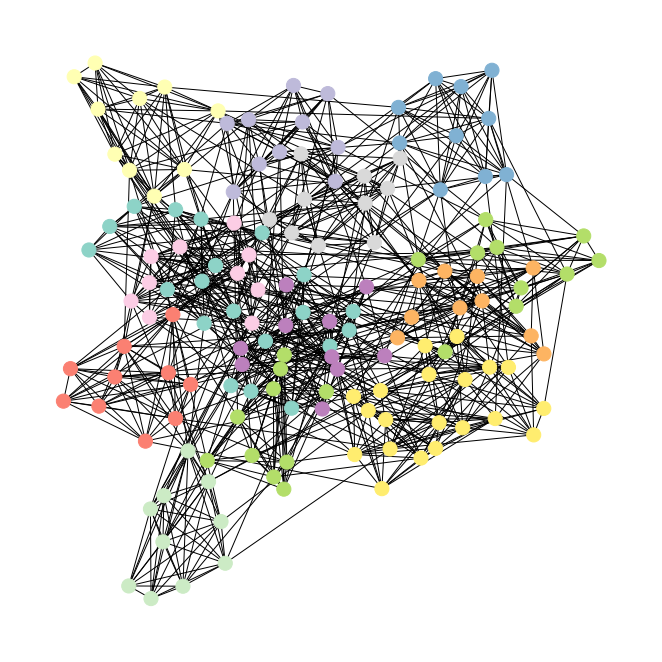

In [22]:
commies = girvan_newman_modified(G, 15)
plot_colored_communities(G, commies)

In [23]:
save_results(commies, 'KU-D2-UNC.csv')

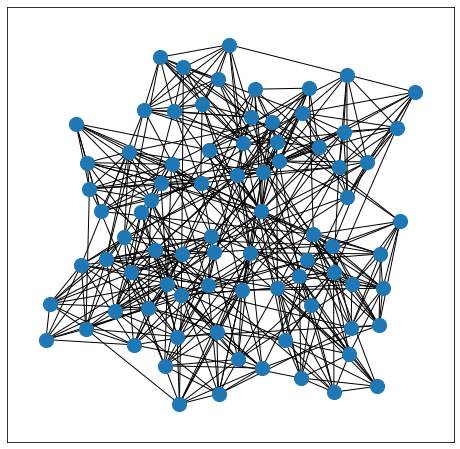

In [24]:
nodes, adjacency_matrix = read_adjacency_matrix_from_csv("D3-UNC.csv")
G = create_graph(nodes, adjacency_matrix)
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=False, node_size=200)

In [25]:
partition = community.best_partition(G)
num_communities = len(set(partition.values()))
num_communities

9

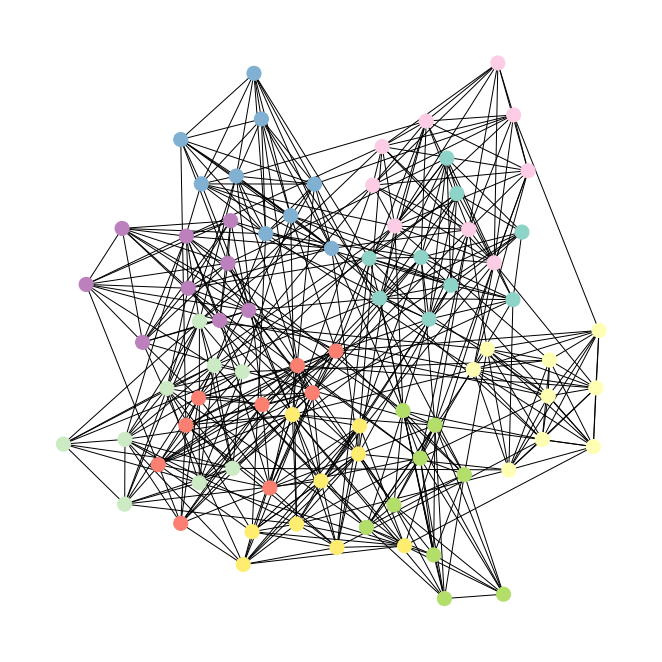

In [27]:
commies = girvan_newman_modified(G, 9)
plot_colored_communities(G, commies)

In [26]:
save_results(commies, 'KU-D3-UNC.csv')

In [28]:
def whole_community_detection(input_file, output_file,  no_communities):
    nodes, adjacency_matrix = read_adjacency_matrix_from_csv(input_file)
    G = create_graph(nodes, adjacency_matrix)
    commies = girvan_newman_modified(G, no_communities)
    save_results(commies, output_file)

In [39]:
import time

In [40]:
start_time = time.time()
whole_community_detection('D1-K=2.csv', 'kuD1-K=2.csv', 2)
print(' %s seconds' % (time.time() - start_time))

 0.18289399147033691 seconds


In [41]:
start_time = time.time()
whole_community_detection('D1-UNC.csv', 'kuD1-UNC.csv', 15)
print(' %s seconds' % (time.time() - start_time))

 6.384255886077881 seconds


In [42]:
start_time = time.time()
whole_community_detection('D2-K=7.csv', 'kuD2-K=7.csv', 7)
print(' %s seconds' % (time.time() - start_time))

 0.6166496276855469 seconds


In [43]:
start_time = time.time()
whole_community_detection('D2-UNC.csv', 'kuD2-UNC.csv', 15)
print(' %s seconds' % (time.time() - start_time))

 59.213895082473755 seconds


In [44]:
start_time = time.time()
whole_community_detection('D3-K=12.csv', 'kuD3-K=12.csv', 12)
print(' %s seconds' % (time.time() - start_time))

 16.16481924057007 seconds


In [45]:
start_time = time.time()
whole_community_detection('D3-UNC.csv', 'kuD3-UNC.csv', 9)
print(' %s seconds' % (time.time() - start_time))

 7.506082057952881 seconds
